# Mass Shooting Analysis_3: Analysing US National Mass Shooting Tracker (MST) Data from 2014-24

In [1]:
import json
import pandas as pd
import numpy as np
import random
from pathlib import Path
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import myst_nb
import wikipedia as wp
import math



In [2]:
mst_df = pd.read_csv('MSA Data\mst14-24_data_big_inc_rem.csv',index_col=0, encoding='utf-8') # Load pre-prepped data
scope = 'USA, 2014-24'

In [3]:
mst_df.head(2)

,date,day,dow,month,year,week,killed,wounded,total,city,state
0,2014-01-01,1,Wed,Jan,2014,1,2,2,4,Norfolk,VA
1,2014-01-03,3,Fri,Jan,2014,1,1,3,4,New York (Queens),NY


In [4]:
day_prim_colours = {"Mon": "#1f77b4", "Tue": "#ff7f0e", "Wed": "#2ca02c", "Thu": "#d62728", "Fri": "#9467bd", "Sat": "#8c564b", "Sun": "#e377c2", }

In [5]:
day_blues = { "Mon": "#dbe9f6", "Tue": "#b3d3e8", "Wed": "#73b3d8","Thu": "#2879b9","Fri": "#08519c", "Sat": "#08306b", "Sun": "#041f3d",}

In [6]:
day_grays = {"Mon": "#f0f0f0", "Tue": "#d9d9d9","Wed": "#bdbdbd", "Thu": "#969696","Fri": "#737373","Sat": "#525252","Sun": "#252525",}

In [27]:
day_colours = {
    "Mon": "#a2bffe",  # pastel blue
    "Tue": "#7af9ab",  # Sea Foam Green
    "Wed": "#ffff14",  # Yellow
    "Thu": "#fdaa48",  # Light Orange    
    "Fri": "#ff474c",  # Light Red
    "Sat": "#910951",  # Reddish Purple
    "Sun": "#632de9",  # Purple Blue
}

In [28]:
month_colours = {
    "Jan": "#4C72B0", "Feb": "#6BAED6", "Mar": "#9ECAE1",
    "Apr": "#41AB5D", "May": "#74C476", "Jun": "#A1D99B",
    "Jul": "#FEC44F", "Aug": "#FE9929", "Sep": "#EC7014",
    "Oct": "#E6550D", "Nov": "#A63603", "Dec": "#756BB1"
}

Text(0.5, 1.0, 'Mass Shooting Incident Annual Totals (USA, 2014-24)')

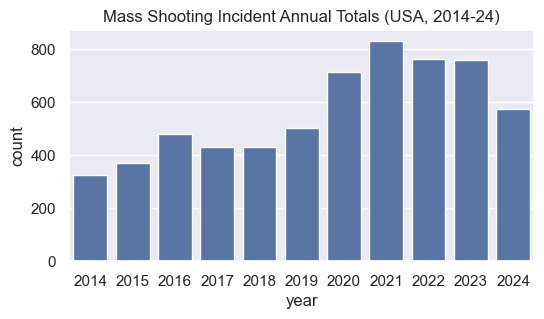

In [6]:
sns.set_theme()
plt.figure(figsize=(6,3))
sns.countplot(mst_df, x='year').set_title('Mass Shooting Incident Annual Totals (' + scope + ')')

Text(0.5, 0, 'Month')

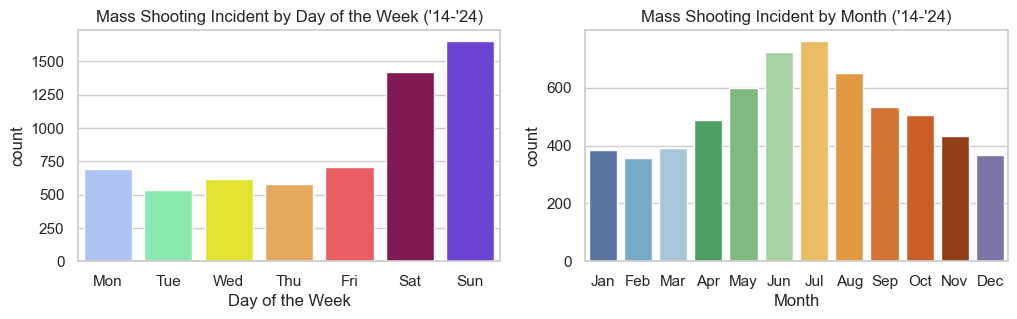

In [30]:
# Set up the matplotlib figure
sns.set_theme(style="whitegrid")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=False)

sns.countplot(mst_df, x='dow', ax=ax1, palette = day_colours, hue='dow',
              order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
             ).set_title('Mass Shooting Incident by Day of the Week (\'14-\'24)')
ax1.set_xlabel("Day of the Week")

sns.countplot(mst_df, x='month', ax=ax2, palette = month_colours, hue='month',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
             ).set_title('Mass Shooting Incident by Month (\'14-\'24)')
ax2.set_xlabel("Month")
#plt.set_title('Mass Shooting Incident by Day of the Week & Month (\'14-\'24)')


**Day of the Week**: No surprise that most shootings occur at the weekend, although it does seem a little surprising that there are more on Sundays than any other day. Because of greater media coverage of school shootings many people automatically think of this type as the classic mass shooting incident, and weigh it disproportionately, expecting most shootings to occur on a weekday towards the beginning of the week. Given the actual pattern of more incidents over the weekend, it seems like the opportunity is more predictive. More people being off work, spending time outside or going out to bars, clubs or restaurants. This general pattern would suggest that many of the 'Sunday' incidents may occur in the early hours. The MST data doesn't give us a time of the incident, but text analysis will hopefully give us an idea of this proportion in the NLP section.


**Month of the Year**: There is a clear trend of more MSI in the warmer summer months peaking with July which has more or less double the amount of incidents that occured in Dec, Jan or Feb. Analysis of the different types of shooting and when they are more likely to occur will help shed more light on this trend, but the general pattern seems to concord with the 'day of the week' pattern, that people being out and about creates more opportunities for this type of incident to occur, rather than more people staying at home as we may assume they do more in winter, comparisons of the patterns in states with differening climates may help to shed more light on this issue, we may also want to consider whether temperature at the time of incidents was unseasonably warmer than usual.

Text(0.5, 1.0, 'Shooting Incident by Week (USA, 2014-24)')

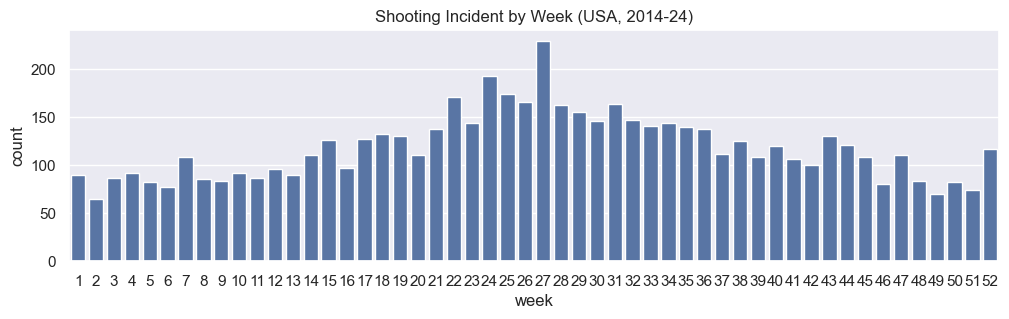

In [39]:
sns.set_theme()
plt.figure(figsize=(12,3))
sns.countplot(mst_df, x='week', order=range(1,53)).set_title('Shooting Incident by Week (' + scope + ')')

**Week of the Year**: If we look at the MSI by week of the year, naturally we see the same approximate shape as the monthly trend but with a few weeks in particular standing out amongst the neighbouring weeks. Week #27 has far more incidents than any other week of the year, which we'll see more information on in the coming charts, but it's also worth noting the upward ticks for the final and first weeks of the year which also see an uptick relative to their neighbouring weeks.

Text(0.5, 1.0, 'Shooting Incident by Day of Month (USA, 2014-24)')

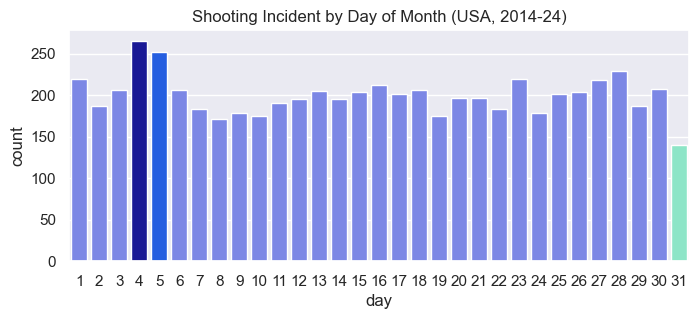

In [35]:
sns.set_theme()
plt.figure(figsize=(8,3))

all_days = sorted(mst_df['day'].unique())
highlight_day = 31    
base_color = '#6a79f7'       # Cornflower Blue
highlight_color = "#7ef4cc" # Turquoise

day_palette = {day: base_color for day in all_days}
day_palette[highlight_day] = highlight_color
day_palette[4] = '#0504aa' #Royal Blue
day_palette[5] = '#0652ff' # Electric Blue

sns.countplot(mst_df, x='day', order=range(1,32), palette=day_palette, hue = 'day', legend=False,).set_title('Shooting Incident by Day of Month (' + scope + ')')

* N.B. The 31st is naturally the date with the lowest number of incidents, as there are only 7 months of the year that have a 31st day. This also affects dates from 29th-30th to a lesser extent with 11 months that include these dates due to February having only 28 days, and 29 in a leap year. This also affects the number of incidents per month, where we can see February has the lowest number of incidents, despite having a similar rate of incidents per week as neighbouring months as the graph of incidents by week shows. If we scale the incidents from the 31st up to 12 months, it would actually be the 3rd highest date only behind the 4th and 5th with 240 incidents in total.
* But why are the 4th and 5th the biggest 2 dates...?

In [41]:
unlucky_day = mst_df.groupby(['day','month']).agg(
    no_ms_inc = pd.NamedAgg(column="killed", aggfunc="count"),
    total_inj = pd.NamedAgg(column="wounded", aggfunc="sum"),
    total_kld = pd.NamedAgg(column="killed", aggfunc="sum"), 
    total_inj_kill = pd.NamedAgg(column="total", aggfunc="sum")
)
unlucky_day.nlargest(10, 'no_ms_inc').reset_index()

,day,month,no_ms_inc,total_inj,total_kld,total_inj_kill
0,4,Jul,74,317,57,374
1,5,Jul,67,302,61,363
2,1,Jan,40,156,38,194
3,11,Jun,40,155,49,204
4,24,Jun,33,127,37,164
5,28,Jul,33,137,34,171
6,17,Jun,32,139,22,161
7,23,Jul,32,125,29,154
8,2,Sep,31,110,33,143
9,8,Aug,31,126,35,161


 - So if we look at the dates on the calendar that have had the most mass shooting incidents over the 10 year period (2014 - 2024), we can see that **July 4th** is the most dangerous day with 75 incidents, followed by **July 5th** (67 incidents) and then a big drop in the incidence to **Jan 1st & Jun 11th** with 40 incidents each. July 4th is obviously a national holiday (independence day)and in Summer, which fits with the general trend we have seen with more incidents in the warmer months and much more on weekends than on weekdays. I presume that many of the incidents that occured on July 5th were in the early hours from independence day 'celebrations' that ran over past midnight. January 1st can be explained through similar principles and is the only date in the top 30 that is in the winter months. June 11th is harder to explain however...
 - Also **July 4th/5th fall in week 27** in most years, which we can see has more incidents than any other week of the year, from the graph of incidents by week.

(-0.5, 10.5)

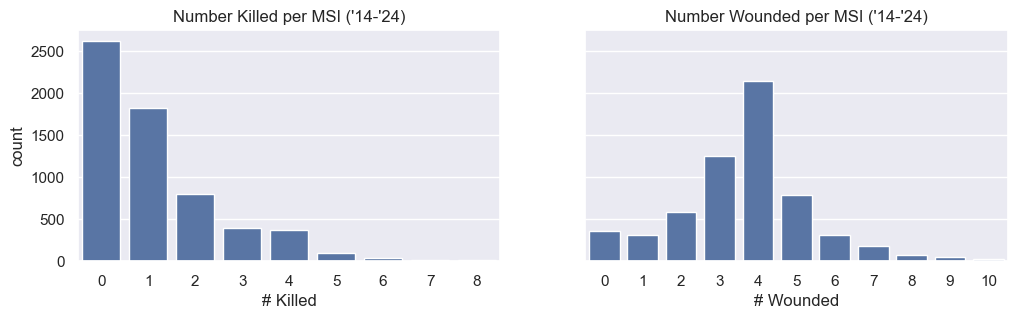

In [42]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

sns.countplot(mst_df, x='killed', ax=ax1).set_title('Number Killed per MSI (\'14-\'24)')
ax1.set_xlabel("# Killed")
ax1.set_xlim(-0.5, 8.5)
sns.countplot(mst_df, x='wounded', ax=ax2).set_title('Number Wounded per MSI (\'14-\'24)')
ax2.set_xlabel("# Wounded")
ax2.set_xlim(-0.5, 10.5)

* Just a warning that due to the way data is recorded on *mass shooting* events ie a minimum of 4 people at least wounded by gunfire, **any shooting incident involving less than 4 people (at least) wounded would not be counted in these stats**, so it skews towards at least 4 people being injured due to the requirements for inclusion in the statistics, so would be a misleading figure to apply to shooting incidents in general. For example, any incidents that involve 3 or fewer people either killed or wounded do not appear here. Thankfully, the majority of *these* mass shooting incidents involve nobody dying, and **so the number of incidents involving 4 people being wounded appears artificially high here, due to the inclusion requirements.**

[Text(0, 0.5, 'State'), Text(0.5, 0, 'Mass Shooting Incidents (2014-24)')]

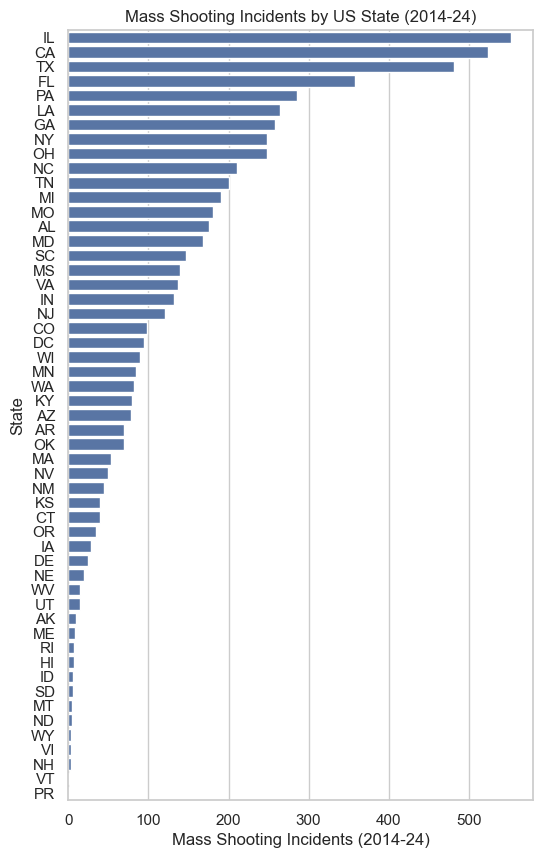

In [43]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))


# Plot the total by state
sns.set_color_codes("pastel")
sns.countplot(mst_df, y='state', order=mst_df['state'].value_counts().index,
             ).set_title('Mass Shooting Incidents by US State (2014-24)')

# Add a legend and informative axis label
ax.set(ylabel='State', xlabel='Mass Shooting Incidents (2014-24)')


**Incidents by State**: If we look at the overall number of Mass Shooting Incidents by state over the 10 year period, we have Illinois with the most, followed by California, Texas and Florida. When we factor in the population of these states we can see that California is by far the biggest (39M), followed by Texas (31M) and Florida (23M), but Illinois is only the 6th biggest State by population with 12.7 million, so would be way out ahead if we look at the rates MSI per capita. Let's explore this in the next section...